In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.api import VAR
plt.style.use('seaborn-v0_8-dark-palette')
plt.rcParams["figure.dpi"] = 200

In [5]:
df = pd.read_csv('../../Data/snp_allstocks_2015_2019.csv')
df = df.set_index('Date')

info = pd.read_csv('../../Data/snp_info.csv')
info.drop(columns=info.columns[0], inplace=True)

In [13]:
display(df)

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES,AMG,AFL,A,APD,AKAM,ALK,ALB,ARE,ALXN,ALGN,ALLE,AGN,ADS,LNT,ALL,GOOGL,GOOG,MO,AMZN,AEE,AAL,AEP,AXP,AIG,AMT,AWK,AMP,ABC,AME,AMGN,...,UTX,UHS,UNM,VFC,VLO,VAR,VTR,VRSN,VRSK,VZ,VRTX,VIAB,V,VNO,VMC,WMT,WBA,DIS,WM,WAT,WEC,WCG,WFC,WELL,WDC,WU,WRK,WY,WHR,WMB,WLTW,WYNN,XEL,XRX,XLNX,XYL,YUM,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-02,164.059998,44.900002,65.889999,37.310001,88.839996,20.129999,72.339996,2.670000,158.559998,13.70,210.429993,30.540001,40.560001,134.532837,63.250000,60.330002,60.310001,89.790001,186.600006,56.200001,55.049999,259.130005,285.369995,33.250000,70.120003,529.549988,521.937744,48.970001,308.519989,45.990002,53.910000,61.150002,93.019997,56.110001,99.669998,53.939999,132.089996,90.459999,52.619999,159.889999,...,115.040001,110.970001,34.740002,73.760002,50.340000,76.307899,83.715881,57.189999,63.970001,46.959999,123.070000,75.400002,66.254997,87.332130,66.980003,85.900002,76.000000,93.750000,51.750000,113.879997,53.189999,80.870003,54.700001,76.949997,110.430000,17.930000,NaN,36.110001,193.009995,45.220001,118.013245,146.889999,36.119999,36.231884,43.599998,38.080002,52.012939,112.589996,28.290001,43.310001
2015-01-05,160.360001,44.910000,64.650002,37.070000,87.339996,19.850000,71.980003,2.660000,156.470001,13.31,202.800003,29.740000,39.799999,130.231262,61.939999,59.470001,58.310001,90.870003,182.169998,56.990002,54.939999,256.690002,281.399994,32.845001,68.730003,519.460022,511.057617,48.689999,302.190002,45.529999,53.880001,60.250000,90.559998,55.000000,98.230003,53.110001,127.849998,89.690002,51.040001,157.990005,...,113.120003,108.699997,33.639999,73.139999,48.270000,75.185463,84.138405,56.240002,63.139999,46.570000,121.029999,73.300003,64.792503,87.551620,65.129997,85.650002,74.500000,92.379997,51.230000,113.019997,52.540001,79.070000,53.200001,77.900002,108.970001,17.760000,NaN,36.110001,189.029999,43.430000,117.165565,144.389999,35.709999,35.441372,42.799999,35.709999,50.956146,116.790001,27.230000,43.049999
2015-01-06,158.649994,44.400002,64.330002,36.130001,86.709999,19.480000,70.529999,2.630000,156.360001,13.01,198.429993,29.475000,39.180000,130.185013,60.669998,58.770000,57.169998,91.330002,177.949997,57.450001,54.849998,255.169998,277.820007,32.740002,68.680000,506.640015,499.212799,48.980000,295.290009,45.000000,53.040001,60.580002,88.629997,54.220001,97.970001,53.250000,124.410004,90.180000,50.060001,152.899994,...,111.519997,108.739998,32.919998,72.709999,47.680000,74.413795,86.011192,55.180000,62.919998,47.040001,117.360001,71.849998,64.375000,88.261276,64.980003,86.309998,74.690002,91.889999,51.270000,112.529999,52.680000,77.820000,52.090000,79.010002,106.540001,17.730000,NaN,36.070000,187.470001,42.840000,116.582779,141.309998,35.900002,34.967060,42.180000,35.500000,50.330696,115.800003,26.190001,42.630001
2015-01-07,159.800003,44.759998,66.930000,37.279999,88.529999,19.059999,71.110001,2.580000,159.720001,13.03,203.300003,29.660000,39.700001,131.591125,60.160000,59.669998,56.939999,92.570000,187.929993,59.570000,55.599998,265.230011,279.950012,33.279999,69.809998,505.149994,498.357513,49.880001,298.420013,45.349998,53.009998,61.439999,90.300003,54.480000,99.000000,53.930000,126.620003,91.980003,50.209999,158.240005,...,112.730003,111.989998,33.230000,73.639999,47.310001,76.150055,87.290169,55.639999,62.959999,46.189999,120.660004,71.300003,65.237503,90.126877,66.209999,88.599998,76.599998,92.830002,51.310001,115.930000,53.330002,79.290001,52.400002,79.739998,108.139999,17.559999,NaN,36.180000,191.880005,42.610001,118.251656,145.460007,36.209999,35.415020,42.200001,35.779999,51.998562,118.680000,26.440001,43.509998
2015-01-08,163.630005,45.680000,67.629997,38.959999,89.879997,19.250000,72.919998,2.610000,161.119995,13.23,205.369995,29.950001,40.889999,134.634598,61.570000,60.700001,58.730000,93.629997,183.800003,61.439999,56.349998,268.959991,287.929993,33.805000,71.150002,506.910004,49

,CAG,MAR,LIN,HCP,MAT
Date,,,,,
2015-01-02,27.875486,77.750000,NaN,40.846996,30.469999
2015-01-05,27.571985,75.620003,NaN,41.256832,30.459999
2015-01-06,27.299610,74.669998,NaN,42.040073,29.809999
2015-01-07,27.945526,76.379997,NaN,42.932606,29.910000
2015-01-08,28.552528,78.910004,NaN,42.358833,29.980000
...,...,...,...,...,...
2018-12-24,20.959999,100.989998,148.130005,26.770000,9.260000
2018-12-26,21.430000,105.580002,152.740005,27.940001,9.940000
2018-12-27,21.219999,106.629997,156.410004,27.809999,9.980000


<Axes: title={'center': 'Stock Selection'}, xlabel='Date', ylabel='Stock Price'>

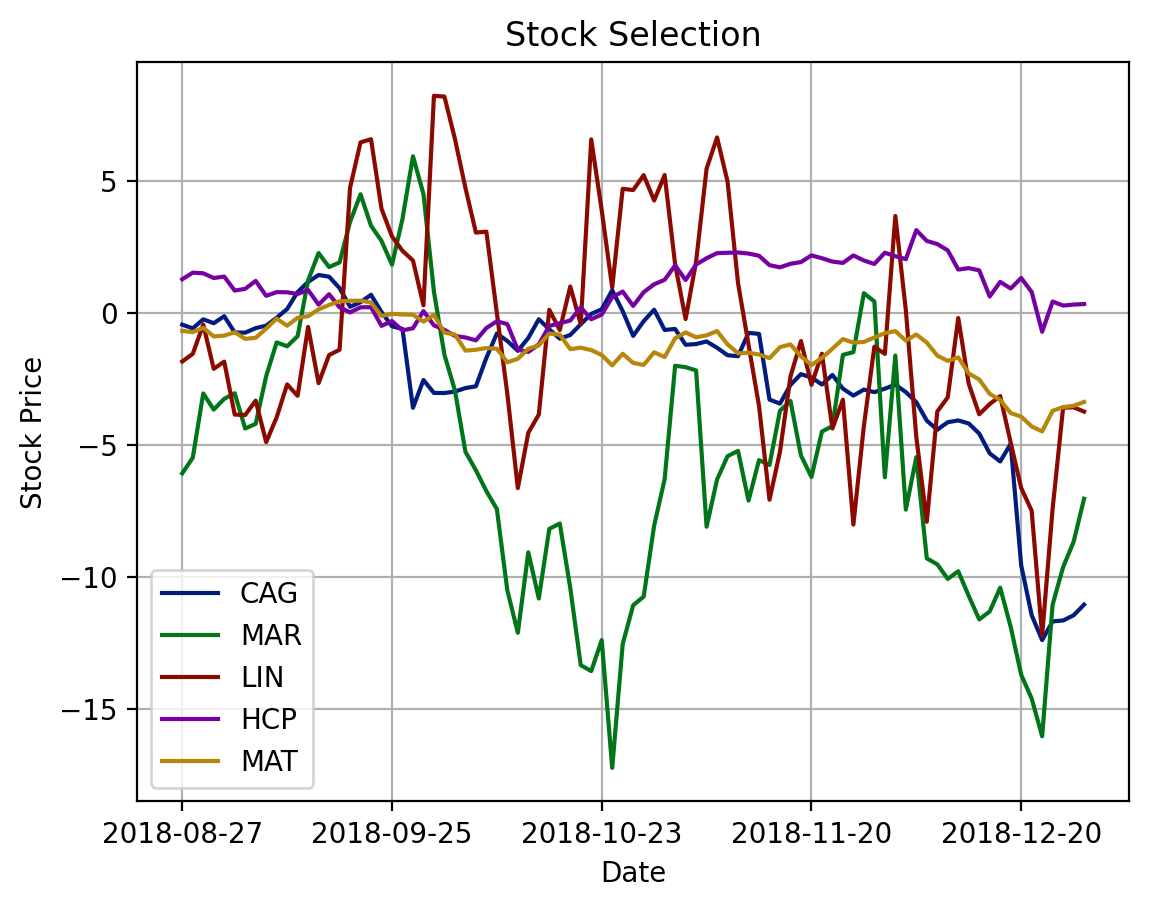

In [22]:
tickers = ['CAG', 'MAR', 'LIN', 'HCP', 'MAT']
stocks = df[tickers]

display(stocks)

stocks_ma = stocks.rolling(window=66).mean()
stocks_detrended = stocks.sub(stocks_ma).dropna()

stocks_detrended.plot(xlabel="Date", ylabel="Stock Price", title="Stock Selection", grid=True)

In [ ]:
model = VAR(stocks_detrended)
results = model.fit(1)

A = results.params[1:].values
eigA, _ = np.linalg.eig(A)

display(A)
display(eigA)

/home/omalley242/University/MIF/MIF_VENV/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


array([[ 8.72785683e-01,  1.13178531e-01, -2.81265128e-01,
         1.19121228e-02,  5.87758455e-02],
       [-6.37454974e-02,  8.95819639e-01, -1.84819596e-01,
        -5.00402511e-03,  2.29167060e-02],
       [ 1.34122025e-04, -1.11677858e-01,  7.04022678e-01,
         4.98159420e-03, -2.55573592e-02],
       [-8.47760250e-02, -8.38309448e-02, -4.01416805e-01,
         9.31707592e-01, -4.64061870e-02],
       [ 6.43072037e-01,  9.49309525e-02,  2.03303615e+00,
        -1.28839016e-02,  8.02973868e-01]])

array([0.71449288+0.12927613j, 0.71449288-0.12927613j,
       1.00635964+0.j        , 0.86051894+0.j        ,
       0.91144512+0.j        ])

In [10]:
for sector in info['GICS Sector'].unique():
    tickers = info.loc[info['GICS Sector'] == sector]['Symbol'].tolist()

    stocks = df[tickers]
    stocks_ma = stocks.rolling(window=66).mean()
    stocks_detrended = stocks.sub(stocks_ma).dropna()